In [1]:
from src.eeg_data_utils import EegDataProcessor
from src.audio_data_utils import  AudioDataProcessor

In [2]:
filepathEeg = '/home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf'
filepathAudio = '/home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/sub-MartaGomezCarmona_ses-VCV_Ses01_task-Default_run-001_eeg.xdf'

In [3]:
eegData = EegDataProcessor(filepathEeg)
#audioData = AudioData(filepathAudio)

*******************Loading /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf File*******************
Extracting EDF parameters from /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3055871  =      0.000 ...  5968.498 secs...
*******************Loaded /home/owaismujtaba/BIDSSpeechDatset/rawData/F10/VCV/GOMEZCARMONA~ _67e7880a-4065-4e37-a165-58982f5f8c3c.edf File*******************
****************Normalizing Triggers********************
****************Correcting Triggers********************
**************** Calculating EEG Transition Indexes********************


In [4]:
eegData.eegEvents[:5]

[['ExperimentEnded', None, 1656410768.0, 0, 4636],
 ['StartBlockSaying', 'Overt', 1656410777.0546875, 4636, 1007],
 ['StartReading', 'Overt', 1656410779.0214844, 5643, 769],
 ['ITI', 'Overt', 1656410780.5234375, 6412, 795],
 ['StartSaying', 'Overt', 1656410782.0761719, 7207, 769]]

In [5]:
eegData.triggers.shape

(3055872,)

In [6]:
from matplotlib import pyplot as plt

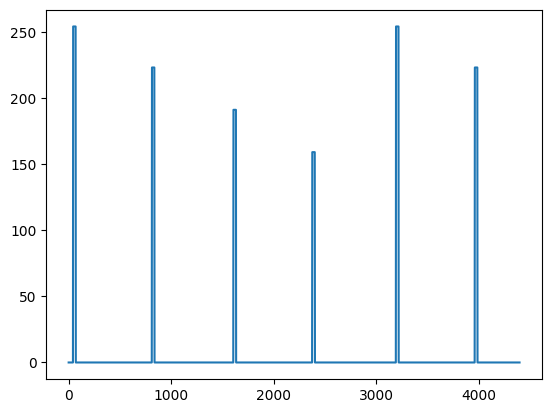

In [7]:
plt.plot(eegData.triggersNormalized[5600:10000])

In [20]:
eegData.eegEvents[0:120]

[['ExperimentEnded', None, 1656410768.0, 0, 4636],
 ['StartBlockSaying', 'Overt', 1656410777.0546875, 4636, 1007],
 ['StartReading', 'Overt', 1656410779.0214844, 5643, 769],
 ['ITI', 'Overt', 1656410780.5234375, 6412, 795],
 ['StartSaying', 'Overt', 1656410782.0761719, 7207, 769],
 ['Fixation', 'Overt', 1656410783.578125, 7976, 817],
 ['StartReading', 'Overt', 1656410785.1738281, 8793, 769],
 ['ITI', 'Overt', 1656410786.6757812, 9562, 841],
 ['StartSaying', 'Overt', 1656410788.3183594, 10403, 770],
 ['Fixation', 'Overt', 1656410789.8222656, 11173, 1016],
 ['StartReading', 'Overt', 1656410791.8066406, 12189, 769],
 ['ITI', 'Overt', 1656410793.3085938, 12958, 786],
 ['StartSaying', 'Overt', 1656410794.84375, 13744, 770],
 ['Fixation', 'Overt', 1656410796.3476562, 14514, 950],
 ['StartReading', 'Overt', 1656410798.203125, 15464, 769],
 ['ITI', 'Overt', 1656410799.7050781, 16233, 893],
 ['StartSaying', 'Overt', 1656410801.4492188, 17126, 770],
 ['Fixation', 'Overt', 1656410802.953125, 1789

In [9]:
audioData = AudioDataProcessor(filepathAudio)

*********************************************************************************
***************************Loading .xdf file***************************
*******************************Completed*******************************
***************************Loading Audio data***************************
***************************Mapping Audio events***************************


In [22]:
for event in audioData.audioEvents:
    print(event)

['ExperimentStarted', None, 1656403961.8758688, 2.2649765014648438e-05, 1647646]
['StartBlockSaying', 'Overt', 1656403961.876073, 2.2649765014648438e-05, 1647655]
['StartReading:UKU', 'Overt', 1656403963.5009758, 2.2649765014648438e-05, 1719314]
['ITI', 'Overt', 1656403965.0040205, 2.2649765014648438e-05, 1785599]
['StartSaying:UKU', 'Overt', 1656403966.793003, 2.2649765014648438e-05, 1864494]
['Fixation', 'Overt', 1656403968.2955263, 2.2649765014648438e-05, 1930756]
['StartReading:IFI', 'Overt', 1656403970.3091776, 2.288818359375e-05, 2019559]
['ITI', 'Overt', 1656403971.8108392, 2.288818359375e-05, 2085783]
['StartSaying:IFI', 'Overt', 1656403973.7580287, 2.2649765014648438e-05, 2171655]
['Fixation', 'Overt', 1656403975.2606428, 2.2649765014648438e-05, 2237921]
['StartReading:AFA', 'Overt', 1656403977.249918, 2.2649765014648438e-05, 2325649]
['ITI', 'Overt', 1656403978.7515795, 2.2649765014648438e-05, 2391873]
['StartSaying:AFA', 'Overt', 1656403980.3123786, 2.2649765014648438e-05, 2

In [10]:
for marker in audioData.markers:
    marker = marker[0]
    print(marker)
    break

ExperimentStarted


In [11]:
audioData.markersTimeStamps[0]

1656403961.8758757

In [12]:
markerTimestamps = audioData.rawData[0][0]['time_stamps']
audioTimestamps = audioData.rawData[0][1]['time_stamps']

In [13]:
import numpy as np
markerTimestamps.shape, audioTimestamps.shape

((1720,), (139444200,))

In [14]:
nearest_indices = []
index = 0
for index in range(markerTimestamps.shape[0]):
    marker = markerTimestamps[index]
    differences = np.abs(audioTimestamps - marker)
    # Find the index of the smallest difference
    nearest_index = np.argmin(differences)
    print(marker, audioData.markers[index], nearest_index, audioTimestamps[nearest_index])
    # Append the index to the list
    nearest_indices.append(nearest_index)
    if index == 10:
        break
    index +=1

print(nearest_indices)

1656403961.8758757 ['ExperimentStarted'] 1647646 1656403961.8758688
1656403961.8760812 ['StartBlockSaying'] 1647655 1656403961.876073
1656403963.5009775 ['StartReading:UKU'] 1719314 1656403963.5009758
1656403965.0040228 ['EndReading:UKU'] 1785599 1656403965.0040205
1656403966.7929919 ['StartSaying:UKU'] 1864494 1656403966.793003
1656403968.2955227 ['EndSaying:UKU'] 1930756 1656403968.2955263
1656403970.3091805 ['StartReading:IFI'] 2019559 1656403970.3091776
1656403971.8108356 ['EndReading:IFI'] 2085783 1656403971.8108392
1656403973.7580252 ['StartSaying:IFI'] 2171655 1656403973.7580287
1656403975.260638 ['EndSaying:IFI'] 2237921 1656403975.2606428
1656403977.2499244 ['StartReading:AFA'] 2325649 1656403977.249918
[1647646, 1647655, 1719314, 1785599, 1864494, 1930756, 2019559, 2085783, 2171655, 2237921, 2325649]


In [15]:
eegData.rawData.get_data().shape

(148, 3055872)

In [16]:
eegData.eegEvents[:10]

[['ExperimentEnded', None, 1656410768.0, 0, 4636],
 ['StartBlockSaying', 'Overt', 1656410777.0546875, 4636, 1007],
 ['StartReading', 'Overt', 1656410779.0214844, 5643, 769],
 ['ITI', 'Overt', 1656410780.5234375, 6412, 795],
 ['StartSaying', 'Overt', 1656410782.0761719, 7207, 769],
 ['Fixation', 'Overt', 1656410783.578125, 7976, 817],
 ['StartReading', 'Overt', 1656410785.1738281, 8793, 769],
 ['ITI', 'Overt', 1656410786.6757812, 9562, 841],
 ['StartSaying', 'Overt', 1656410788.3183594, 10403, 770],
 ['Fixation', 'Overt', 1656410789.8222656, 11173, 1016]]

In [17]:
audioData.markers[:5]

[['ExperimentStarted'],
 ['StartBlockSaying'],
 ['StartReading:UKU'],
 ['EndReading:UKU'],
 ['StartSaying:UKU']]

In [18]:
audioData.cleanMarkers()

AttributeError: 'AudioDataProcessor' object has no attribute 'cleanMarkers'

In [ ]:
audioData.markersNew[:10]

[['ExperimentStarted', None, 1656411161.8758757],
 ['StartBlockSaying', 'Overt', 1656411161.8760812],
 ['StartReading:UKU', 'Overt', 1656411163.5009775],
 ['ITI', 'Overt', 1656411165.0040228],
 ['StartSaying:UKU', 'Overt', 1656411166.7929919],
 ['Fixation', 'Overt', 1656411168.2955227],
 ['StartReading:IFI', 'Overt', 1656411170.3091805],
 ['ITI', 'Overt', 1656411171.8108356],
 ['StartSaying:IFI', 'Overt', 1656411173.7580252],
 ['Fixation', 'Overt', 1656411175.260638]]

In [ ]:
len(eegData.eegEvents)

2560

In [ ]:
len(audioData.markersNew)

1720